In [2]:
import os
from scipy.odr import *
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data/Aufg22.csv')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

data = pd.read_csv(DATA, comment='#', engine='python')
data['dx[muM]'] -= 10
data.head(3)

,O,dx[muM]
0,0,0.0
1,5,2.1
2,10,4.0


lambda =  [6.25903226e-07] +/- [5.78461243e-09]


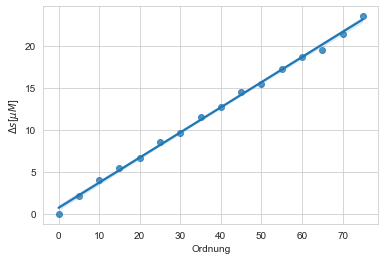

In [3]:
def lin(B, x):
    return B*x

linear = Model(lin)

dx_err = np.full(len(data), 0.5)  # muM
m_err = np.full(len(data), 2)  # 1

data_ = RealData(data['O'], (data['dx[muM]']*10**-6), m_err, dx_err)

odr = ODR(data_, linear, beta0=[3*10^-9])
output = odr.run()
print("lambda = ", output.beta * 2, "+/-", output.sd_beta * 2)

sns.regplot('O', 'dx[muM]', data)
plt.ylabel('$\Delta s [\mu M]$')
plt.xlabel('Ordnung')
plt.savefig(os.path.join(PLOTS, 'Aufg22_plot.png'), dpi=200)